In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [141]:
startdate = datetime(2010,1,1)
enddate = datetime(2021,12,31)

y_symbols=['AAPL']
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [142]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344925,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,177.171738,59773000


In [143]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [144]:
df = df.drop(['Date','Adj Close'], axis = 1)

In [145]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


ValueError: x and y must have same first dimension, but have shapes (3020,) and (2183,)

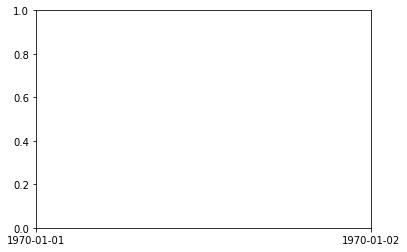

In [146]:
import matplotlib.dates as mdates
import datetime as dt
now = datetime(2010,1,1)
then = datetime(2021,12,15)
days = mdates.drange(now,then,dt.timedelta(days=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=360))
plt.plot(df.Close,days)
plt.gcf().autofmt_xdate()
plt.show()

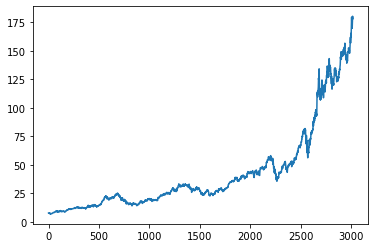

In [147]:
plt.plot(df.Close)

In [148]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3015,175.850006,176.850006,175.270004,176.279999,68356600
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900


In [149]:
df['date'] = pd.date_range(start='1/4/2010', periods=len(df), freq='D')

In [150]:
df.tail()

,Open,High,Low,Close,Volume,date
3015,175.850006,176.850006,175.270004,176.279999,68356600,2018-04-07
3016,177.089996,180.419998,177.070007,180.330002,74919600,2018-04-08
3017,180.160004,181.330002,178.529999,179.289993,79144300,2018-04-09
3018,179.330002,180.630005,178.139999,179.380005,62348900,2018-04-10
3019,179.470001,180.570007,178.089996,178.199997,59773000,2018-04-11


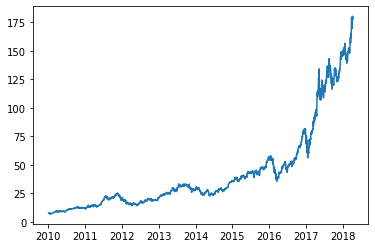

In [151]:
plt.plot(df.date,df.Close)

In [152]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

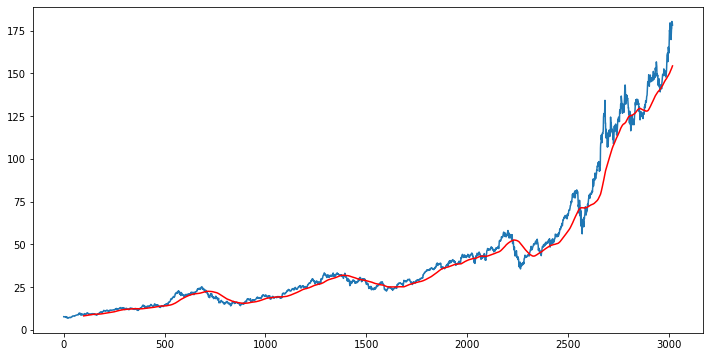

In [153]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [154]:
ma200 = df.Close.rolling(200).mean()

In [155]:
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3015    142.55920
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
Name: Close, Length: 3020, dtype: float64

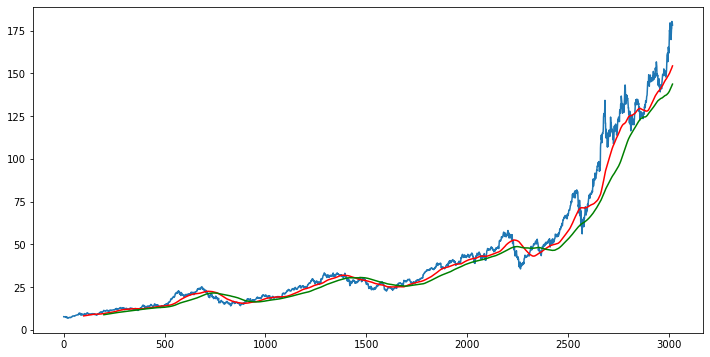

In [156]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200,'g')

In [157]:
df.shape

(3020, 6)

In [158]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [159]:
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [160]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [162]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [163]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
!pip install keras 
!pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 6.0/6.0 MB 3.5 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 1.5/1.5 MB 3.4 MB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1


In [164]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences=True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [165]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [166]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [167]:
model.fit(x_train, y_train, epochs =90)

Epoch 1/90
63/63 [==============================] - 20s 160ms/step - loss: 0.0330
Epoch 2/90
63/63 [==============================] - 10s 156ms/step - loss: 0.0073
Epoch 3/90
63/63 [==============================] - 14s 217ms/step - loss: 0.0070
Epoch 4/90
63/63 [==============================] - 16s 248ms/step - loss: 0.0058
Epoch 5/90
63/63 [==============================] - 15s 242ms/step - loss: 0.0051
Epoch 6/90
63/63 [==============================] - 15s 244ms/step - loss: 0.0052
Epoch 7/90
63/63 [==============================] - 15s 234ms/step - loss: 0.0050
Epoch 8/90
63/63 [==============================] - 11s 177ms/step - loss: 0.0053
Epoch 9/90
63/63 [==============================] - 11s 177ms/step - loss: 0.0049
Epoch 10/90
63/63 [==============================] - 11s 176ms/step - loss: 0.0041
Epoch 11/90
63/63 [==============================] - 11s 175ms/step - loss: 0.0043
Epoch 12/90
63/63 [==============================] - 11s 175ms/step - loss: 0.0045
Epoch 13/90
6

In [168]:
model.save('Keras_model.h5')

In [169]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [170]:
past_100_days=data_training.tail(100)

In [171]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\Chirag\AppData\Local\Temp\ipykernel_26536\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [172]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [173]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99281675],
       [0.99343845],
       [0.98528824]])

In [174]:
input_data.shape

(1006, 1)

In [175]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    

In [176]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [177]:
#Making Predictions 

y_predicted = model.predict(x_test)

29/29 [==============================] - 2s 48ms/step


In [178]:
y_predicted.shape

(906, 1)

In [179]:
scaler.scale_

array([0.00690691])

In [180]:
scale_factor = 1/0.02099517

In [181]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


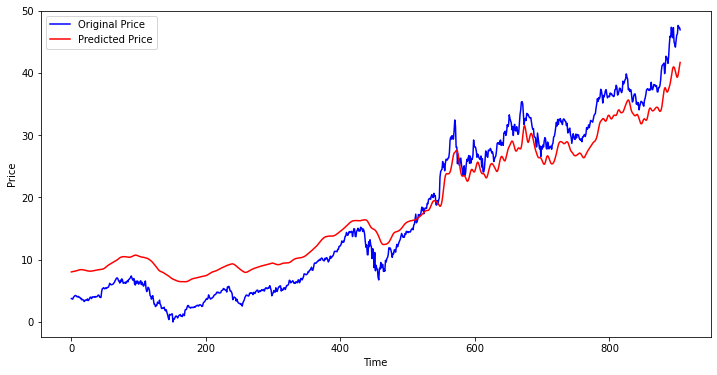

In [182]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [184]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_predicted)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3.47089352995653
MSE: 14.121682857064267
RMSE: 3.757882762549181
R-Squared: 0.9187028103734225
